#### Imports

In [3]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


#### Fuzzy e database

##### Antecedentes


In [4]:
aparencia = ctrl.Antecedent(np.arange(0, 31, 1), 'aparencia')
ph = ctrl.Antecedent(np.arange(0, 15, 0.1), 'pH')
turbidez = ctrl.Antecedent(np.arange(0, 11, 0.1), 'turbidez')

##### Consequente

In [5]:
qualidade = ctrl.Consequent(np.arange(0, 101, 1), 'qualidade')

In [5]:
print(qualidade.universe)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


##### Funções de pertinência

In [6]:
aparencia['boa'] = fuzzy.trapmf(aparencia.universe, [0, 0, 4, 6])
aparencia['adequada'] = fuzzy.trapmf(aparencia.universe, [4, 6, 14, 16])
aparencia['inadequada'] = fuzzy.trapmf(aparencia.universe, [14, 16, 30, 30])

/home/josev/git/Prova2SI/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


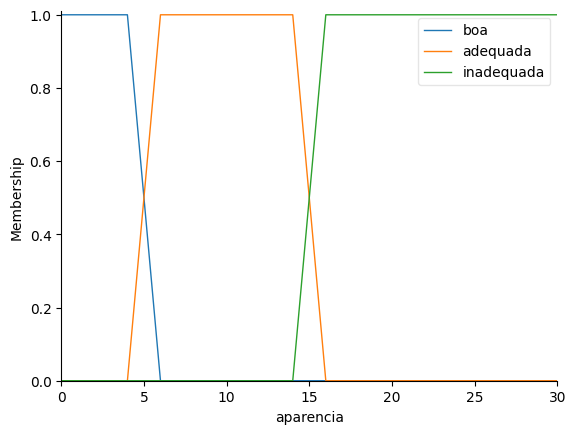

In [7]:
aparencia.view()

In [8]:
ph["inadequado baixo"] = fuzzy.trapmf(ph.universe, [0, 0, 5.5, 6])
ph["adequado baixo"] = fuzzy.trapmf(ph.universe, [5.5, 6, 6.5, 7])
ph["bom"] = fuzzy.trapmf(ph.universe, [6.5, 7, 8.5, 9])
ph["adequado alto"] = fuzzy.trapmf(ph.universe, [8.5, 9, 9.5, 10])
ph["inadequado alto"] = fuzzy.trapmf(ph.universe, [9.5, 10, 15, 15])

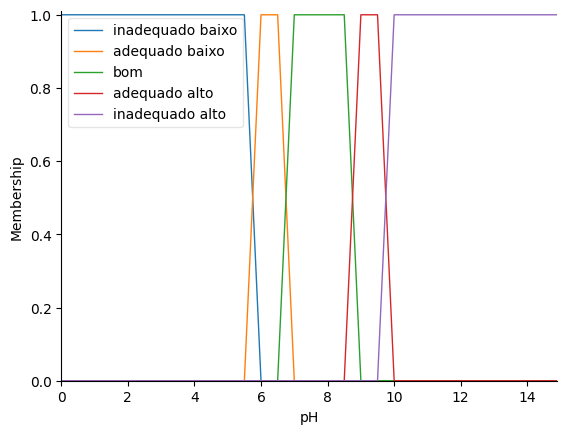

In [9]:
ph.view()

In [10]:
turbidez['boa'] = fuzzy.trapmf(turbidez.universe, [0, 0, 0.6, 1.4])
turbidez['adequada'] = fuzzy.trapmf(turbidez.universe, [0.6, 1.4, 4.4, 5.6])
turbidez['inadequada'] = fuzzy.trapmf(turbidez.universe, [4.4, 5.6, 11, 11])

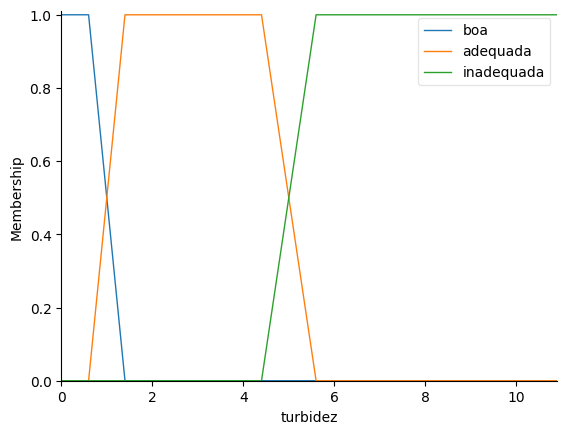

In [11]:
turbidez.view()

In [12]:
qualidade['inadequada'] = fuzzy.trapmf(qualidade.universe, [0, 0, 40, 50])
qualidade['adequada'] = fuzzy.trapmf(qualidade.universe, [40, 50, 70, 80])
qualidade['boa'] = fuzzy.trapmf(qualidade.universe, [70, 80, 101, 101])

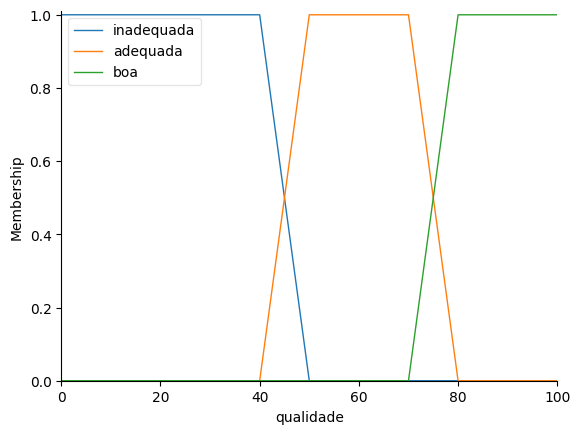

In [13]:
# Lembrando que qualidade está em porcentagem
qualidade.view()

##### Regras

In [14]:
rules = [
    ctrl.Rule(aparencia['boa'] & ph['inadequado baixo'] & turbidez['boa'], qualidade['inadequada']),
    ctrl.Rule(aparencia['boa'] & ph['adequado baixo'] & turbidez['boa'], qualidade['adequada']),
    ctrl.Rule(aparencia['boa'] & ph['bom'] & turbidez['boa'], qualidade['boa']),
    ctrl.Rule(aparencia['boa'] & ph['adequado alto'] & turbidez['boa'], qualidade['adequada']),
    ctrl.Rule(aparencia['boa'] & ph['inadequado alto'] & turbidez['boa'], qualidade['inadequada']),
    ctrl.Rule(aparencia['boa'] & ph['inadequado baixo'] & turbidez['adequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['boa'] & ph['adequado baixo'] & turbidez['adequada'], qualidade['adequada']),
    ctrl.Rule(aparencia['boa'] & ph['bom'] & turbidez['adequada'], qualidade['boa']),
    ctrl.Rule(aparencia['boa'] & ph['adequado alto'] & turbidez['adequada'], qualidade['adequada']),
    ctrl.Rule(aparencia['boa'] & ph['inadequado alto'] & turbidez['adequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['boa'] & ph['inadequado baixo'] & turbidez['inadequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['boa'] & ph['adequado baixo'] & turbidez['inadequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['boa'] & ph['bom'] & turbidez['inadequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['boa'] & ph['adequado alto'] & turbidez['inadequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['boa'] & ph['inadequado alto'] & turbidez['inadequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['adequada'] & ph['inadequado baixo'] & turbidez['boa'], qualidade['inadequada']),
    ctrl.Rule(aparencia['adequada'] & ph['adequado baixo'] & turbidez['boa'], qualidade['adequada']),
    ctrl.Rule(aparencia['adequada'] & ph['bom'] & turbidez['boa'], qualidade['adequada']),
    ctrl.Rule(aparencia['adequada'] & ph['adequado alto'] & turbidez['boa'], qualidade['adequada']),
    ctrl.Rule(aparencia['adequada'] & ph['inadequado alto'] & turbidez['boa'], qualidade['inadequada']),
    ctrl.Rule(aparencia['adequada'] & ph['inadequado baixo'] & turbidez['adequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['adequada'] & ph['adequado baixo'] & turbidez['adequada'], qualidade['adequada']),
    ctrl.Rule(aparencia['adequada'] & ph['bom'] & turbidez['adequada'], qualidade['adequada']),
    ctrl.Rule(aparencia['adequada'] & ph['adequado alto'] & turbidez['adequada'], qualidade['adequada']),
    ctrl.Rule(aparencia['adequada'] & ph['inadequado alto'] & turbidez['adequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['adequada'] & ph['inadequado baixo'] & turbidez['inadequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['adequada'] & ph['adequado baixo'] & turbidez['inadequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['adequada'] & ph['bom'] & turbidez['inadequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['adequada'] & ph['adequado alto'] & turbidez['inadequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['adequada'] & ph['inadequado alto'] & turbidez['inadequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['inadequada'] & ph['inadequado baixo'] & turbidez['boa'], qualidade['inadequada']),
    ctrl.Rule(aparencia['inadequada'] & ph['adequado baixo'] & turbidez['boa'], qualidade['inadequada']),
    ctrl.Rule(aparencia['inadequada'] & ph['bom'] & turbidez['boa'], qualidade['adequada']),
    ctrl.Rule(aparencia['inadequada'] & ph['adequado alto'] & turbidez['boa'], qualidade['inadequada']),
    ctrl.Rule(aparencia['inadequada'] & ph['inadequado alto'] & turbidez['boa'], qualidade['inadequada']),
    ctrl.Rule(aparencia['inadequada'] & ph['inadequado baixo'] & turbidez['adequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['inadequada'] & ph['adequado baixo'] & turbidez['adequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['inadequada'] & ph['bom'] & turbidez['adequada'], qualidade['adequada']),
    ctrl.Rule(aparencia['inadequada'] & ph['adequado alto'] & turbidez['adequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['inadequada'] & ph['inadequado alto'] & turbidez['adequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['inadequada'] & ph['inadequado baixo'] & turbidez['inadequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['inadequada'] & ph['adequado baixo'] & turbidez['inadequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['inadequada'] & ph['bom'] & turbidez['inadequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['inadequada'] & ph['adequado alto'] & turbidez['inadequada'], qualidade['inadequada']),
    ctrl.Rule(aparencia['inadequada'] & ph['inadequado alto'] & turbidez['inadequada'], qualidade['inadequada']),
]

##### Sistema de Controle

In [15]:
sistema_controle = ctrl.ControlSystem(rules)
sistema = ctrl.ControlSystemSimulation(sistema_controle)

##### Banco de Dados

In [16]:
x_aparencia = np.linspace(0, 30, 10)
x_pH = np.linspace(0, 14, 10)
x_turbidez = np.linspace(0, 10, 10)

x = []
y = []
for aparencia_item in x_aparencia:
    for pH_item in x_pH:
        for turbidez_item in x_turbidez:
            sistema.input["aparencia"] = aparencia_item
            sistema.input["pH"] = pH_item
            sistema.input["turbidez"] = turbidez_item

            sistema.compute()
            x.append([aparencia_item, pH_item, turbidez_item])
            y.append(sistema.output["qualidade"])

x = np.array(x)
y = np.array(y)


#### MLP

In [17]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)  # 20% para testes

# Normalização dos dados
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Treinamento do modelo de regressão usando MLP
model = MLPRegressor(random_state=1, max_iter=5000).fit(x_train, y_train)

# Avaliação do modelo
score = model.score(x_test, y_test)

# Efetuando predições
predictions = model.predict(x_test)

print()
print(f"Score (R2): {score}")
print(mean_squared_error(y_test, predictions))


Score (R2): 0.8120364946539492
28.42567405103877


#### PSO

In [18]:
from pyswarm import pso

# Função a ser otimizada (usando o modelo treinado para prever as saídas)
def objective_function(x):
    normalized_x = scaler.transform([x])
    y_pred = model.predict(normalized_x)
    return -y_pred

lb = [0, 0, 0]  
ub = [30, 14, 10]  

# Usando PSO para otimizar a função
best_params, best_score = pso(objective_function, lb, ub)

print("Melhores parâmetros encontrados:", best_params)
print("Máxima qualidade prevista:", -best_score)

Stopping search: Swarm best objective change less than 1e-08
Melhores parâmetros encontrados: [0.         7.81471139 2.20859849]
Máxima qualidade prevista: [88.71518933]


#### Conclusão

A análise dos resultados obtidos com o sistema fuzzy para verificar a qualidade da água, levando em conta variáveis como aparência (intervalo de 0 - 30 unidades Hazen), turbidez (intervalo de 0 - 10 unidades de cor) e pH (intervalo de 0 - 14), mostra como essa abordagem é eficaz realizar categorizações ou previsões com base em critérios subjetivos.
Para melhorar o processo de previsão da qualidade da água, utilizamos um modelo de regressão Multi-Layer Perceptron (MLP). Esse modelo de rede neural aprendeu a relação entre as variáveis de entrada e a qualidade da água, aplicando a técnica de otimização conhecida como Enxame de Partículas (PSO). O PSO foi fundamental para explorar o espaço de parâmetros e encontrar os valores ideais que maximizassem a qualidade prevista.
Os melhores parâmetros encontrados pelo PSO foram [0.0, 7.81471142, 2.20859846], e a qualidade máxima da água prevista alcançou 88.7151893. Esses resultados mostram que o modelo conseguiu identificar as configurações ideais para garantir uma qualidade de água de alta precisão, com um desempenho que pode ser ainda mais aprimorado com ajustes finos nos parâmetros do sistema fuzzy e na rede neural. A análise sugere que a combinação de lógica fuzzy e redes neurais pode ser uma abordagem robusta e eficaz para avaliar a qualidade da água.